## Created by - Prasoon

### UNEMPLOYMENT ANALYSIS WITH PYTHON
##### Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so we are analyzing the employment rate for this project.

In [1]:
# Improting libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import calendar

In [2]:
# Loading the dataset
df = pd.read_csv("/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [3]:
# Checking for missing values
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [4]:
# Checking duplicate values
df.duplicated().sum()

0

In [5]:
# Getting the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


##### We can see that there are many blankspaces in the column names. So, we have remove them and we can also change the column names as per our convenience.

In [6]:
# Changing the column names
df.columns = ['States', 'Date', 'Frequency', 'Estimated_Unemployment_Rate', 'Estimated_Employed',
             'Estimated_Labour_Participation_Rate', 'Region', 'Longitude', 'Latitude']
df.head()    # Checking first five rows of the dataset

,States,Date,Frequency,Estimated_Unemployment_Rate,Estimated_Employed,Estimated_Labour_Participation_Rate,Region,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [7]:
# Function to check for extra spaces in a cell
def has_extra_spaces(cell):
    if isinstance(cell, str):
        return ' ' in cell
    return False

# Apply the function to the entire Dataframe
has_extra_spaces_df = df.applymap(has_extra_spaces).sum()

# Print the Dataframe indicating cells with extra spaces
print(has_extra_spaces_df)

States                                  69
Date                                   267
Frequency                              267
Estimated_Unemployment_Rate              0
Estimated_Employed                       0
Estimated_Labour_Participation_Rate      0
Region                                   0
Longitude                                0
Latitude                                 0
dtype: int64


##### We see that States, Date and Frequency has extra spaces.

In [8]:
# Checking the States column 
df['States'].value_counts()

States
Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: count, dtype: int64

##### The States column can have extra spaces as some states have two words.

In [9]:
# Checking the Frequency columns
df['Frequency'].value_counts()

Frequency
 M    267
Name: count, dtype: int64

In [10]:
# Checking the Date columns
df['Date'].value_counts()

Date
 31-03-2020    27
 31-05-2020    27
 30-06-2020    27
 31-07-2020    27
 31-08-2020    27
 30-09-2020    27
 31-10-2020    27
 31-01-2020    26
 29-02-2020    26
 30-04-2020    26
Name: count, dtype: int64

##### The extra spaces from the Date and Frequecny columns have to be removed.

In [11]:
# Remove spaces from 'Date' and 'Frequency' columns
df[['Date', 'Frequency']] = df[['Date', 'Frequency']].apply(lambda x: x.str.replace(' ', ''))
df.head()

,States,Date,Frequency,Estimated_Unemployment_Rate,Estimated_Employed,Estimated_Labour_Participation_Rate,Region,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [12]:
# Checking for the extra spaces in the datatframe again
has_extra_spaces_df = df.applymap(has_extra_spaces).sum()

# Print the Dataframe indicating cells with extra spaces
print(has_extra_spaces_df)

States                                 69
Date                                    0
Frequency                               0
Estimated_Unemployment_Rate             0
Estimated_Employed                      0
Estimated_Labour_Participation_Rate     0
Region                                  0
Longitude                               0
Latitude                                0
dtype: int64


##### All the required extra spaces have been removed.

In [13]:
# Converting Date column from object to datetime
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtypes)    # checking the datatype of Date column 

datetime64[ns]


/tmp/ipykernel_20/1469524079.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [14]:
# Extract the month and create a new 'Month' column
df['Month'] = df['Date'].dt.month.apply(lambda x: calendar.month_name[x])

# Print the updated Dataframe
df.head()

,States,Date,Frequency,Estimated_Unemployment_Rate,Estimated_Employed,Estimated_Labour_Participation_Rate,Region,Longitude,Latitude,Month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,January
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,February
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,March
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,April
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,May


In [15]:
# Summary statistics of the Estimated_Unemployment_Rate, Estimated_Employed and 
# Estimated_Labour_Participation_Rate Columns
round(df[['Estimated_Unemployment_Rate', 'Estimated_Employed',
             'Estimated_Labour_Participation_Rate']].describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Estimated_Unemployment_Rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated_Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated_Labour_Participation_Rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


#### Correlation 
##### Correlation is a statistical measure that quantifies the extent to which two variables change together. It describes the statistical relationship between two or more random variables. In simpler terms, correlation indicates whether there is a tendency for one variable to increase or decrease when the other variable does the same.

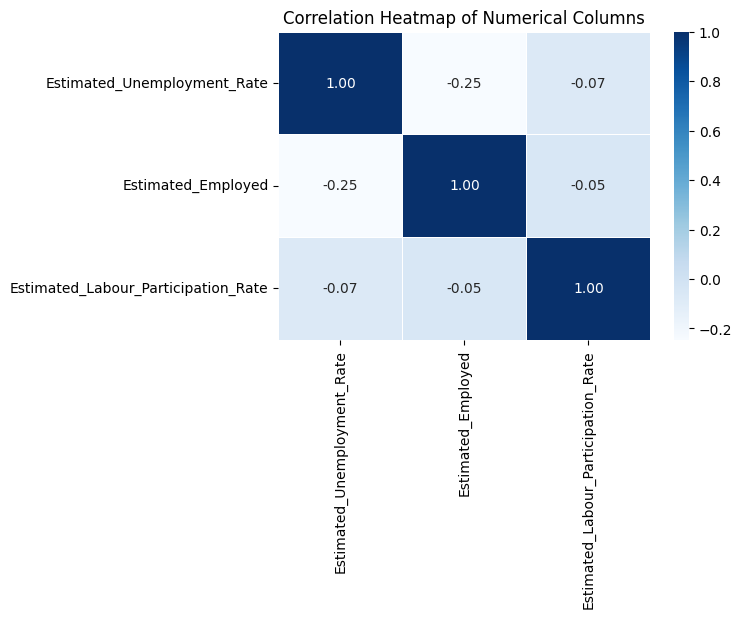

In [16]:
# Selecting the columns with numerical values
numerical_columns = ['Estimated_Unemployment_Rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate']

# Creating correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Creating a heatmap using the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidth=0.5)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()


##### None of the columns are correlated.

#### Exploratory Data Analysis
##### Analysing the Estimated Unemployment Rate

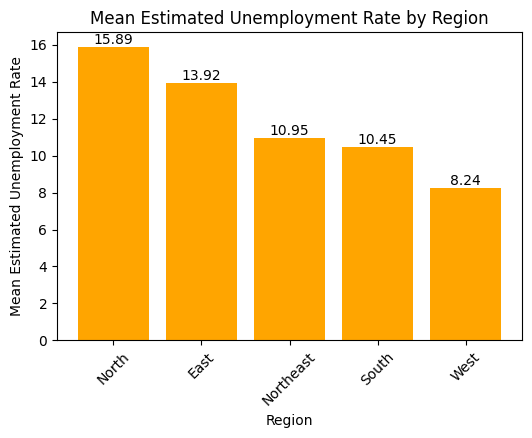

In [17]:
# Group data by 'Region' and calculate the mean of 'Estimated_Unemployment_Rate'
region_means = df.groupby('Region')['Estimated_Unemployment_Rate'].mean().sort_values(ascending=False)

# Create a bar chart with region names on the x-axis and mean Estimated Unemployment Rate on the y-axis
plt.figure(figsize=(6, 4))
plt.bar(region_means.index, region_means.values, color='orange')
plt.title('Mean Estimated Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Unemployment Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Annotate the values on top of each bar
for i, v in enumerate(region_means.values):
    plt.annotate(f'{v:.2f}', (i, v), ha='center', va='bottom')

plt.show()

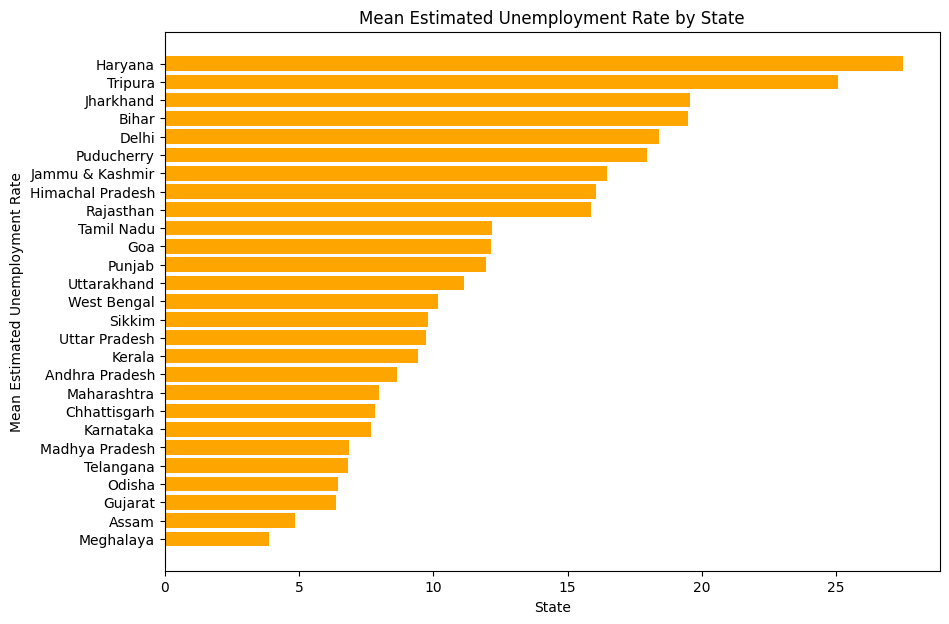

In [18]:
# Group data by 'State' and calculate the mean of 'Estimated_Unemployment_Rate'
state_means = df.groupby('States')['Estimated_Unemployment_Rate'].mean().sort_values(ascending=True)

# Create a bar chart with State names on the x-axis and mean Estimated Unemployment Rate on the y-axis
plt.figure(figsize=(10, 7))
plt.barh(state_means.index, state_means.values, color='orange')
plt.title('Mean Estimated Unemployment Rate by State')
plt.xlabel('State')
plt.ylabel('Mean Estimated Unemployment Rate')

plt.show()

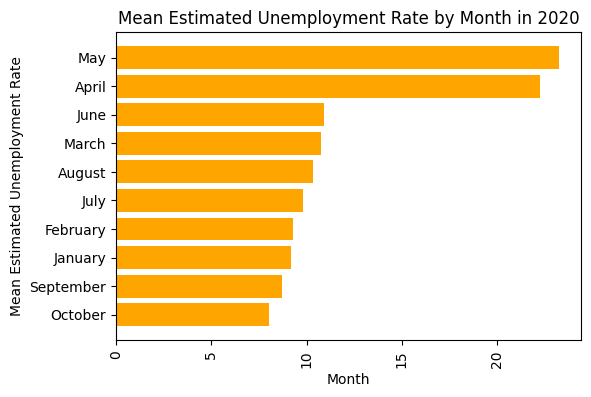

In [19]:
# Group data by Month and calculate the mean of 'Estimated_Unemployment_Rate'
Date_means = df.groupby("Month")['Estimated_Unemployment_Rate'].mean().sort_values(ascending=True)

plt.figure(figsize=(6,4))
plt.barh(Date_means.index, Date_means.values, color='orange')
plt.title("Mean Estimated Unemployment Rate by Month in 2020")
plt.xlabel("Month")
plt.ylabel("Mean Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.show()

In [20]:
# Create a hierarchical DataFrame for the treemap
hierarchical_df = df.groupby(['Region', 'States'])['Estimated_Unemployment_Rate'].mean().reset_index()

# Create an interactive treemap using Plotly Express
fig = px.treemap(hierarchical_df, path=['Region', 'States'], values='Estimated_Unemployment_Rate',
                 color='Estimated_Unemployment_Rate', hover_data=['Estimated_Unemployment_Rate'],
                 color_continuous_scale='Viridis')

# Add labels for Estimated_Unemployment_Rate values
fig.update_traces(textinfo="label+value")

# Customize the treemap layout
fig.update_layout(title='Interactive Treemap of Estimated Unemployment Rate by Region and State',
                  coloraxis_showscale=True)

# Show the interactive treemap
fig.show()

##### Analysing Estimated Employed

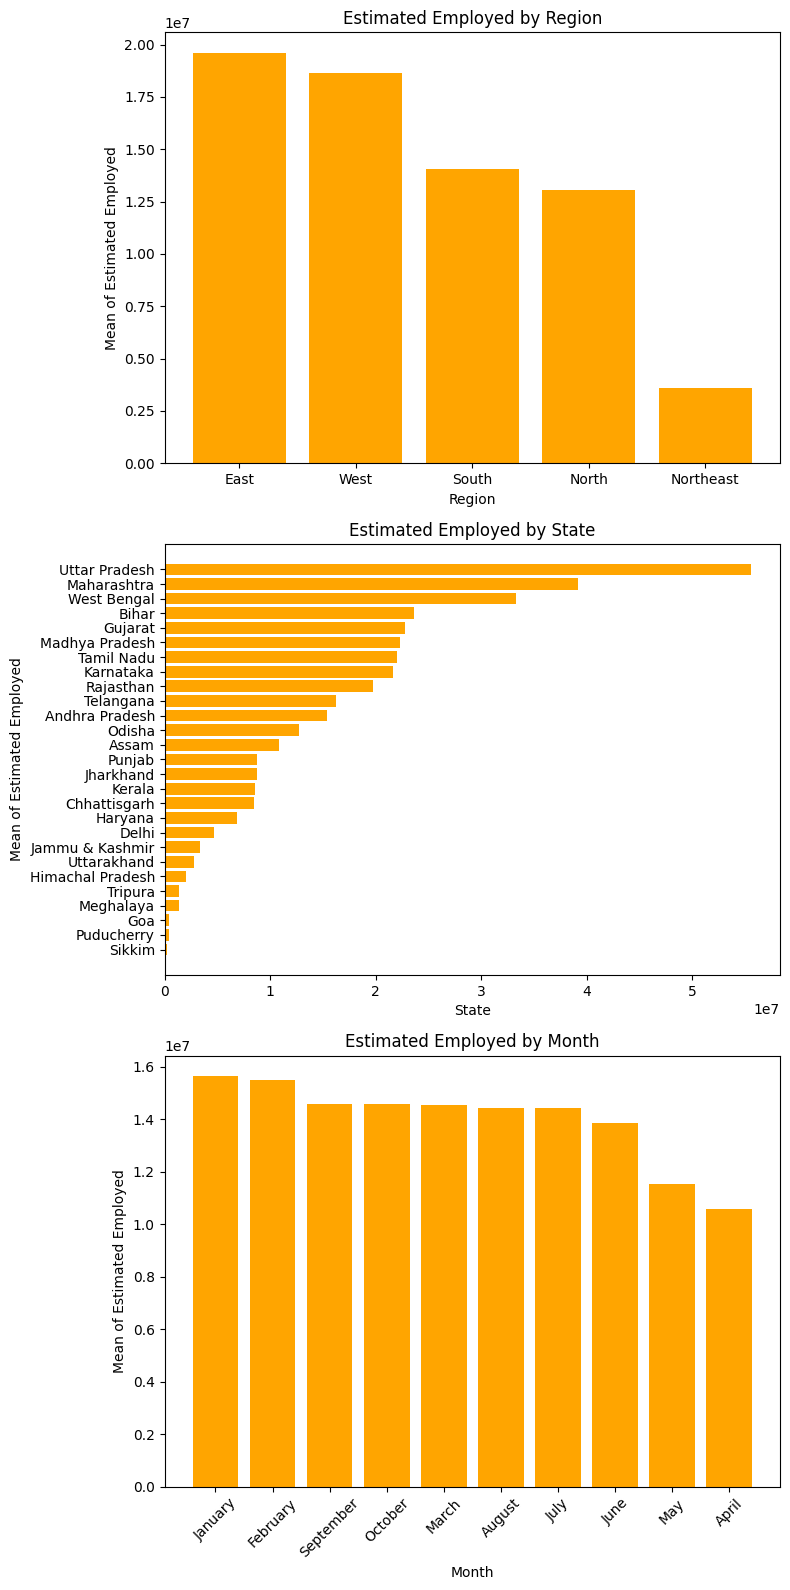

In [21]:
# Group data by Region and calculate the mean of 'Estimated_Employed'
EE_region = df.groupby('Region')['Estimated_Employed'].mean().sort_values(ascending=False)

# Group data by State and calculate the mean of 'Estimated_Employed'
EE_state = df.groupby('States')['Estimated_Employed'].mean().sort_values(ascending=True)

# Group data by Month and calculate the mean of 'Estimated_Employed'
EE_month = df.groupby('Month')['Estimated_Employed'].mean().sort_values(ascending=False)

# Create separate subplots for 'Region', 'States', and 'Month'
fig, axes = plt.subplots(3, 1, figsize=(8, 16))

# Creating bar chart for Region
axes[0].bar(EE_region.index, EE_region.values, color='orange')
axes[0].set_title("Estimated Employed by Region")
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Mean of Estimated Employed")

# Creating bar chart for State
axes[1].barh(EE_state.index, EE_state.values, color='orange')
axes[1].set_title("Estimated Employed by State")
axes[1].set_xlabel("State")
axes[1].set_ylabel("Mean of Estimated Employed")


# Creating bar chart for Month
axes[2].bar(EE_month.index, EE_month.values, color='orange')
axes[2].set_title("Estimated Employed by Month")
axes[2].set_xlabel("Month")
axes[2].set_ylabel("Mean of Estimated Employed")
axes[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

#### Insights for Estimated Unemployment Rate
##### 1. May and April Months has the highest estimated unemployment rate.
##### 2.North Region has the highest estimted unemployment rate. East Region is at the second place.
##### 3. In North Region Haryana has the highest estimated unemployment rate of 27.447.
##### 4. In Northeast Region Tripura has the highest estimated unemployment rate of 25.055.
##### 5. In South Region Puducherry has the highest estimated unemployment rate of 19.942.
##### 6. In East Region Jharkhand has the highest estimated unemployment rate of 19,539.
##### 7. In West Region Goa has the highest estimated unemployment rate of 12.167.